In [161]:
#import necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [162]:
# Import the GRF data and store in a dataframe
df = pd.read_csv("tred02.csv")

# Drop unnamed and empty columns for acceleration
df = df.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'])

# Rename columns
df = df.rename(columns={'PRV142-L': 'Total', 'Unnamed: 0': 'Time'})

# Drop first rows (strings)
df = df.drop(index=0)

# Rearrange columns so every single dataset follows the same order: 'Time', 'Forefoot', 'Midfoot', 'Heel', 'Total'
def rearrange_columns(df):
    cols = ['Time', 'Forefoot', 'Midfoot', 'Heel', 'Total']
    cols_present = df.columns.tolist()
    cols_rearranged = [col for col in cols if col in cols_present] + [col for col in cols_present if col not in cols]
    return df[cols_rearranged]

df = rearrange_columns(df)

# Change datatype to float
df['Time'] = df['Time'].astype(float)
df['Forefoot'] = df['Forefoot'].astype(float)
df['Midfoot'] = df['Midfoot'].astype(float)
df['Heel'] = df['Heel'].astype(float)
df['Total'] = df['Total'].astype(float)

# Import the metadata and set 'Comment' as index
metadata = pd.read_excel('labels tredmill.xlsx', index_col='Comment')

# Extract body weight for each subject
subjectName = 'Tred002'
body_weight = metadata.loc[subjectName, 'Mass (kg)']

# Normalize GRF columns by body weight
df['NormForefoot'] = df['Forefoot'] / body_weight
df['NormMidfoot'] = df['Midfoot'] / body_weight
df['NormHeel'] = df['Heel'] / body_weight
df['NormTotal'] = df['Total'] / body_weight

# Define the distance from each sensor to the ankle joint center
#sensor_to_ankle = {"NormForefoot": 0.1, "NormMidfoot": 0.2, "NormHeel": 0.05}  

# Calculate the moment arm for each zone
#cop = df[["NormForefoot", "NormMidfoot", "NormHeel"]].to_numpy()
#moment_arm = cop - np.array([sensor_to_ankle["NormForefoot"], sensor_to_ankle["NormMidfoot"], sensor_to_ankle["NormHeel"]]).reshape(1, -1)

# Calculate the plantar flexion moment for each zone
#force = df[["NormForefoot", "NormMidfoot", "NormHeel"]].to_numpy()
#plantar_flexion_moment = force * moment_arm

# Calculate the total plantar flexion moment
#total_plantar_flexion_moment = np.sum(plantar_flexion_moment, axis=1)

# Add the total plantar flexion moment to the DataFrame
#df["Plantar Flexion Moment"] = total_plantar_flexion_moment

# Print the resulting DataFrame
df.head()

/var/folders/tx/zndgmlw50p13w72wm7zv8xnm0000gn/T/ipykernel_40344/497154349.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("tred02.csv")


,Time,Forefoot,Midfoot,Heel,Total,NormForefoot,NormMidfoot,NormHeel,NormTotal
1,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000
2,0.01,139.38,22.08,172.50,333.96,2.212381,0.350476,2.738095,5.300952
3,0.02,134.55,29.67,169.74,333.96,2.135714,0.470952,2.694286,5.300952
4,0.03,137.31,24.84,169.74,331.89,2.179524,0.394286,2.694286,5.268095
5,0.04,129.72,26.91,166.98,323.61,2.059048,0.427143,2.650476,5.136667


In [166]:
### ADD ACHILLES TENDON LOADING TO DATAFRAME WITH THE MATLAB ALGORITHM ###



In [167]:
time_ranges_labels = ['warm_up', 'Slow1', 'Medium1', 'Fast1', 'Slow2', 'Medium2', 'Fast2', 'Slow3', 'Medium3', 'Fast3', 'Slow4', 'Medium4', 'Fast4', 'Slow5', 'Medium5', 'Fast5', 'Slow6', 'Medium6', 'Fast6', 'cool_down']
time_ranges_values = [30, 175, 176, 215, 225, 250, 251, 277, 280, 340, 350, 375, 380, 392, 400, 457, 461, 494, 497, 523, 528, 582, 585, 620, 621, 654, 655, 722, 727, 754, 757, 777, 786, 842, 845, 883, 885, 910, 914, 1098]
incline_ranges_labels = ['0', '10', '10', '10', '0', '0', '0', '20', '20', '20', '5', '5', '5', '25', '25', '25', '15', '15', '15','0']

def map_time_to_speed(time):
    for i in range(0, len(time_ranges_values), 2):
        start = time_ranges_values[i]
        end = time_ranges_values[i+1] if i+1 < len(time_ranges_values) else float('inf')
        label = time_ranges_labels[i//2]
        if start <= time < end:
            return label
        else:
            continue
    return 'no label'  # Return 'no label' if no appropriate label was found

def map_time_to_incline(time):
    for i in range(0, len(time_ranges_values), 2):
        start = time_ranges_values[i]
        end = time_ranges_values[i+1] if i+1 < len(time_ranges_values) else float('inf')
        label = incline_ranges_labels[i//2]
        if start <= time < end:
            return label
        else:
            continue
    return 'no label'  # Return 'no label' if no appropriate label was found

# Add the 'Speed' and 'Incline' columns to the DataFrame using the 'apply()' method
df['Speed'] = df['Time'].apply(map_time_to_speed)
df['Incline'] = df['Time'].apply(map_time_to_incline)

# Add the 'Combined' column to the DataFrame using the 'apply()' method
df['Combined'] = df['Speed'] + '_' + df['Incline']

#df['Speed'].unique()
#df['Incline'].unique()
#df.head()
df.sample(n=10)
#print(df[(df['Time'] >= 278) & (df['Time'] < 285)])

# Test the 'map_time_to_speed()' function for some input times
#print(map_time_to_incline(40))  # Expected output: 
#print(map_time_to_speed(700))  # Expected output: 
#print(map_time_to_speed(2000)) # Expected output: 

,Time,Forefoot,Midfoot,Heel,Total,NormForefoot,NormMidfoot,NormHeel,NormTotal,Speed,Incline,Combined
33900,338.99,0.00,0.00,7.48,7.48,0.000000,0.000000,0.118730,0.118730,Slow2,0,Slow2_0
8477,84.76,0.00,2.49,4.98,7.47,0.000000,0.039524,0.079048,0.118571,warm_up,0,warm_up_0
94109,941.08,0.00,0.00,2.38,2.38,0.000000,0.000000,0.037778,0.037778,cool_down,0,cool_down_0
64133,641.32,129.92,53.36,322.48,505.76,2.062222,0.846984,5.118730,8.027937,Fast4,5,Fast4_5
64050,640.49,425.00,17.00,23.80,465.80,6.746032,0.269841,0.377778,7.393651,Fast4,5,Fast4_5
86952,869.51,500.00,17.50,27.50,545.00,7.936508,0.277778,0.436508,8.650794,Medium6,15,Medium6_15
63081,630.80,636.12,13.95,8.37,658.44,10.097143,0.221429,0.132857,10.451429,Fast4,5,Fast4_5
36693,366.92,327.00,28.34,132.98,488.32,5.190476,0.449841,2.110794,7.751111,Medium2,0,Medium2_0
50438,504.37,342.00,7.50,1.50,351.00,5.428571,0.119048,0.023810,5.571429,Fast3,20,Fast3_20
104002,1040.01,439.76,53.36,57.04,550.16,6.980317,0.846984,0.905397,8.732698,cool_down,0,cool_down_0


In [168]:
# Define a function to find the intersection points
def find_intersection(df, col1, col2):
    indices = np.argwhere(np.diff(np.sign(df[col1] - df[col2]))).flatten()
    intersection_times = df.iloc[indices]['Time'].values
    x_values = [time for time in intersection_times if df.loc[df['Time'] == time][col1].iloc[0] == 0]
    return indices, intersection_times, x_values

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


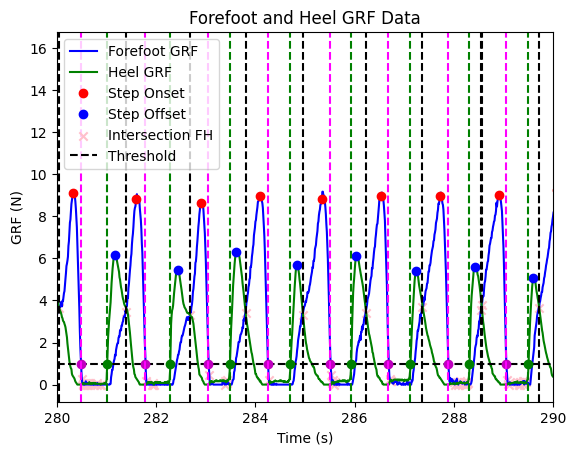

In [169]:
# Set minimum peak height and distance between peaks for forefoot signal
min_peak_height_ff = 7  # adjust as needed
min_peak_distance_ff = 80  # adjust as needed

# Find peaks in the Forefoot GRF signal
signal_ff = df['NormForefoot']
peaks_ff, _ = find_peaks(signal_ff, height=min_peak_height_ff, distance=min_peak_distance_ff)

# Add column to dataframe to indicate step onsets
df['Step Onset'] = False
df.loc[peaks_ff, 'Step Onset'] = True

# Set minimum peak height and distance between peaks for heel signal
min_peak_height_h = 3.5  # adjust as needed
min_peak_distance_h = 80  # adjust as needed

# Find peaks in the Heel GRF signal
signal_h = df['NormHeel']
peaks_h, _ = find_peaks(signal_h, height=min_peak_height_h, distance=min_peak_distance_h)

# Add column to dataframe to indicate step offsets
df['Step Offset'] = False
df.loc[peaks_h, 'Step Offset'] = True

# Extract the time and Forefoot/Heel data from the DataFrame
time = df['Time'].values
forefoot = df['NormForefoot'].values
heel = df['NormHeel'].values

# Create a boolean array for the true step onsets and offsets
true_step_onsets = df['Step Onset'].values
true_step_offsets = df['Step Offset'].values

# Plot the Forefoot and Heel GRF data
fig, ax = plt.subplots()
ax.plot(time, forefoot, label='Forefoot GRF', color='blue')
ax.plot(time, heel, label='Heel GRF', color='green')

# Plot a red dot at each true step onset
ax.plot(time[true_step_onsets], forefoot[true_step_onsets], 'ro', label='Step Onset')

# Plot a blue dot at each true step offset
ax.plot(time[true_step_offsets], heel[true_step_offsets], 'bo', label='Step Offset')




#Find the intersection points for all combinations of columns
indices_fh, intersection_times_fh, x_values_fh = find_intersection(df, 'NormForefoot', 'NormHeel')

plt.scatter(intersection_times_fh, df.iloc[indices_fh]['NormForefoot'].values, label='Intersection FH', color='pink', marker='x')

# Display the x coordinate of the intersections that have y>2
for i in range(len(intersection_times_fh)):
    if df.iloc[indices_fh[i]]['NormForefoot'] >= 2:
       plt.axvline(x=intersection_times_fh[i], color='black', linestyle='--')




# Set x-axis limits
ax.set_xlim(280, 290)



# Add horizontal line at y=1
ax.axhline(y=1, color='k', linestyle='--', label='Threshold')

# Add green dots where the Heel signal crosses y=1 with positive slope
for i in range(len(heel)-1):
    if heel[i] < 1 and heel[i+1] > 1 and (heel[i+1]-heel[i])/(time[i+1]-time[i]) > 0:
        ax.plot(time[i], 1, 'go')
        ax.axvline(x=time[i], color='green', linestyle='--')

# Add magenta dots where the Forefoot signal crosses y=1 with negative slope
for i in range(len(forefoot)-1):
    if forefoot[i] > 1 and forefoot[i+1] < 1 and (forefoot[i+1]-forefoot[i])/(time[i+1]-time[i]) < 0:
        ax.plot(time[i], 1, 'mo')
        ax.axvline(x=time[i], color='magenta', linestyle='--')
                
                

# Label the plot
ax.set_xlabel('Time (s)')
ax.set_ylabel('GRF (N)')
ax.set_title('Forefoot and Heel GRF Data')
ax.legend()

# Show the plot
plt.show()